In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from networks import fcn_isotropic
import scipy
import torch.nn as nn

In [2]:
data = np.load(r'F:\Synthetic_data_no_defect\2025_10_24_sample_100x100x5mm_no_defect_isotropic_gaussian_heat.npz', allow_pickle=True)

In [3]:
data['meta']

array([['time', '28/10/2025 11:07:19'],
       ['lamp_power', '200'],
       ['lamp_power_units', 'W'],
       ['T1', '4'],
       ['T1_units', 'frames'],
       ['T2', '30'],
       ['T2_units', 'frames'],
       ['T3', '300'],
       ['T3_units', 'frames'],
       ['fps', '30.0'],
       ['fps_units', 'frames/s'],
       ['height', '512'],
       ['height_units', 'pixels'],
       ['width', '512'],
       ['width_units', 'pixels'],
       ['sequence_length', '334'],
       ['sequence_length_units', 'frames'],
       ['working_distance', '200.0'],
       ['working_distance_units', 'mm'],
       ['thickness', '0.005'],
       ['thickness_units', 'm'],
       ['size_X', '0.1'],
       ['size_X_units', 'm'],
       ['size_Y', '0.1'],
       ['size_Y_units', 'm'],
       ['thermal_conductivity', '2.0'],
       ['thermal_conductivity_units', 'W/(m·K)'],
       ['density', '1600.0'],
       ['density_units', 'kg/m^3'],
       ['specific_heat', '700.0'],
       ['specific_heat_units', 'J/(kg

In [4]:
data['data'].shape

(334, 512, 512)

In [5]:
print(f"There is: {512*512} of initial conditions, and there is {(4*512)*3000} boundary conditions") 

There is: 262144 of initial conditions, and there is 6144000 boundary conditions


In [6]:
T,H,W=data['data'].shape
H_center=H//2
W_center=W//2

Text(0.5, 1.0, 'Cooling phase')

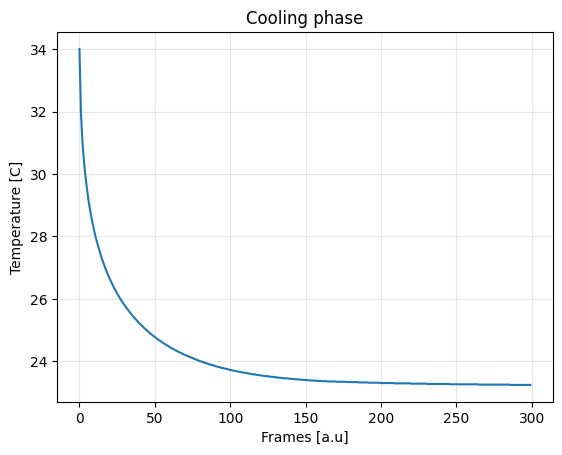

In [7]:
plt.plot(data['data'][34:,H_center,W_center])
plt.ylabel('Temperature [C]')
plt.xlabel('Frames [a.u]')
plt.grid(alpha=0.3)
plt.title('Cooling phase')

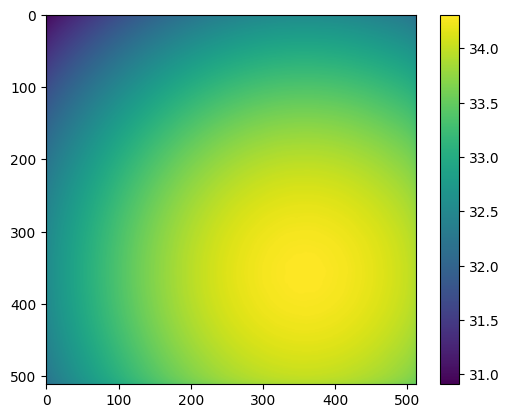

In [8]:
plt.imshow(data['data'][34,:,:])
plt.colorbar()

In [9]:
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Simple network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )
    def forward(self, x):
        return self.layers(x)

# Dummy data
x = torch.linspace(-1, 1, 100).unsqueeze(1)
y_true = x.pow(3)

# Model, loss, optimizer
model = Net()
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=1.0, max_iter=500, history_size=10, tolerance_grad=1e-9)

# L-BFGS requires a closure function that reevaluates the loss
def closure():
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y_true)
    loss.backward()
    return loss

# Training
optimizer.step(closure)

# Test result
with torch.no_grad():
    y_pred = model(x)
    print("Final loss:", criterion(y_pred, y_true).item())


Final loss: 3.145639482227125e-07


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

# ---- Dummy model ----
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.layers(x)

# ---- Dummy data ----
torch.manual_seed(0)
x = torch.randn(64, 2)
y_true = torch.sin(x[:, :1]) + 0.3 * torch.cos(x[:, 1:2])

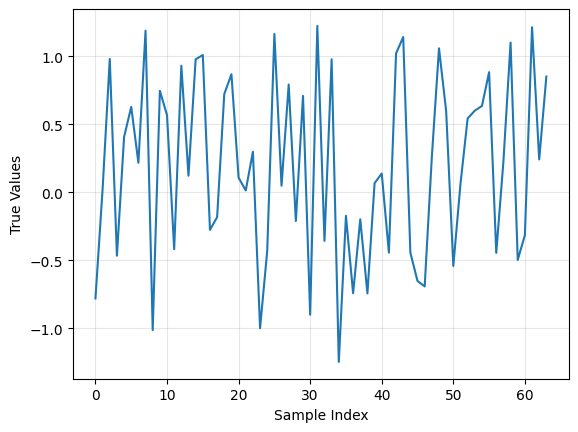

In [12]:
plt.plot(y_true.detach())
plt.xlabel('Sample Index')
plt.ylabel('True Values')
plt.grid(alpha=0.3)

In [13]:
# ---- Init ----
net = Net()
optimizer = optim.Adam(net.parameters(), lr=1e-3)
w = torch.ones(4, requires_grad=True)

alpha = 0.12
lambda_bal = 0.1

In [14]:
net.eval()
y_pred = net(x)
loss1 = torch.mean((y_pred - y_true) ** 2)
loss2 = torch.mean(torch.abs(torch.sin(y_pred - y_true)))
loss3 = torch.mean(torch.exp(0.1 * torch.abs(y_pred - y_true))) - 1
loss4 = torch.mean(torch.abs(y_pred - y_true))
losses = torch.stack([loss1, loss2, loss3, loss4])

In [22]:
w.size()

torch.Size([4])

In [29]:
for p in net.parameters():
    print(p.shape)

torch.Size([64, 2])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([1, 64])
torch.Size([1])


In [28]:
list(net.parameters())[0]

Parameter containing:
tensor([[-0.2215, -0.6961],
        [-0.1895,  0.0963],
        [-0.5344, -0.0457],
        [ 0.5862, -0.0398],
        [ 0.0118, -0.0902],
        [ 0.1237,  0.5433],
        [ 0.7435,  0.3280],
        [ 0.7532, -0.0072],
        [-0.7215, -0.2061],
        [ 0.5351, -0.0342],
        [-0.3496, -0.5877],
        [-0.6415, -0.6748],
        [-0.1591,  0.5045],
        [ 0.2925, -0.7211],
        [ 0.4704, -0.4759],
        [-0.1846, -0.2720],
        [-0.1731, -0.1139],
        [-0.6844, -0.5006],
        [-0.1444, -0.0877],
        [-0.3169,  0.3259],
        [-0.6823,  0.0048],
        [ 0.5822, -0.3599],
        [ 0.6321,  0.1927],
        [-0.7133,  0.3194],
        [-0.0935, -0.3200],
        [ 0.4927, -0.6604],
        [ 0.1429, -0.1271],
        [ 0.4795,  0.1532],
        [ 0.3150,  0.3043],
        [-0.1765, -0.0708],
        [-0.6364,  0.2876],
        [ 0.6075,  0.3754],
        [-0.5649,  0.0039],
        [-0.5538, -0.3009],
        [-0.4233,  0.2477]

In [23]:
# ---- Training ----
net.train()
for epoch in range(300):
    optimizer.zero_grad()

    y_pred = net(x)
    loss1 = torch.mean((y_pred - y_true) ** 2)
    loss2 = torch.mean(torch.abs(torch.sin(y_pred - y_true)))
    loss3 = torch.mean(torch.exp(0.1 * torch.abs(y_pred - y_true))) - 1
    loss4 = torch.mean(torch.abs(y_pred - y_true))
    losses = torch.stack([loss1, loss2, loss3, loss4])

    # Weighted total loss (keep graph)
    total_loss = torch.sum(w * losses)
    total_loss.backward(retain_graph=True)

    # Compute gradient norms of each task
    shared_params = list(net.parameters())[0]
    grad_norms = torch.stack([
        torch.norm(torch.autograd.grad(w[i] * losses[i], shared_params, retain_graph=True, create_graph=True)[0])
        for i in range(4)
    ])

    # Compute GradNorm target
    mean_grad_norm = grad_norms.mean().detach()
    mean_loss = losses.mean().detach()
    loss_ratio = losses.detach() / mean_loss
    target_grad_norm = mean_grad_norm * (loss_ratio ** alpha)

    # GradNorm loss — depends on w via grad_norms
    gradnorm_loss = torch.sum(torch.abs(grad_norms - target_grad_norm))

    # Update w
    w_grad = torch.autograd.grad(gradnorm_loss, w, retain_graph=True)[0]
    with torch.no_grad():
        w -= lambda_bal * w_grad
        w[:] = torch.clamp(w, min=1e-3)
        w /= w.sum() * 4  # normalize around 1/4 each

    # Now update model
    optimizer.zero_grad()
    total_loss = torch.sum(w.detach() * losses)
    total_loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch:4d} | Losses {[round(l.item(),4) for l in losses]} | Weights {[round(v.item(),3) for v in w]}")



Epoch    0 | Losses [0.6752, 0.5944, 0.0742, 0.7074] | Weights [0.061, 0.064, 0.063, 0.062]
Epoch   10 | Losses [0.0719, 0.2138, 0.0223, 0.2192] | Weights [0.03, 0.024, 0.173, 0.022]
Epoch   20 | Losses [0.0649, 0.1572, 0.0168, 0.1642] | Weights [0.044, 0.01, 0.19, 0.006]
Epoch   30 | Losses [0.038, 0.0976, 0.0103, 0.1011] | Weights [0.036, 0.021, 0.166, 0.027]
Epoch   40 | Losses [0.0314, 0.1102, 0.0114, 0.1125] | Weights [0.053, 0.021, 0.162, 0.014]
Epoch   50 | Losses [0.031, 0.086, 0.009, 0.0886] | Weights [0.053, 0.021, 0.152, 0.024]
Epoch   60 | Losses [0.0279, 0.0805, 0.0084, 0.0829] | Weights [0.036, 0.025, 0.176, 0.013]
Epoch   70 | Losses [0.0244, 0.0751, 0.0078, 0.077] | Weights [0.047, 0.024, 0.173, 0.006]
Epoch   80 | Losses [0.0223, 0.0699, 0.0073, 0.0717] | Weights [0.036, 0.025, 0.169, 0.02]
Epoch   90 | Losses [0.0196, 0.0662, 0.0069, 0.0677] | Weights [0.048, 0.015, 0.172, 0.015]
Epoch  100 | Losses [0.0174, 0.0627, 0.0065, 0.0639] | Weights [0.05, 0.022, 0.155, 0.022

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dummy network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.shared = nn.Linear(2, 64)
        self.heads = nn.ModuleList([nn.Linear(64, 1) for _ in range(4)])
    
    def forward(self, x):
        h = torch.relu(self.shared(x))
        return [head(h) for head in self.heads]

# Dummy input
x = torch.randn(64, 2)

# Initialize network and weights for 4 losses
net = Net()
w = nn.Parameter(torch.ones(4))  # GradNorm weights
optimizer = optim.Adam(list(net.parameters()) + [w], lr=1e-3)
alpha = 1.5  # GradNorm alpha

# Compute initial losses (L_i(0)) for GradNorm
with torch.no_grad():
    outputs = net(x)
    # 3 nonlinear losses, 1 linear
    initial_losses = torch.tensor([
        (outputs[0]**2).mean(),
        torch.sin(outputs[1]).pow(2).mean(),
        torch.exp(outputs[2]).mean(),
        outputs[3].mean()
    ])

# Training loop
for step in range(200):
    optimizer.zero_grad()
    
    outputs = net(x)
    
    # Compute individual losses
    losses = torch.stack([
        (outputs[0]**2).mean(),
        torch.sin(outputs[1]).pow(2).mean(),
        torch.exp(outputs[2]).mean(),
        outputs[3].mean()
    ])
    
    # Weighted total loss
    weighted_loss = torch.sum(w * losses)
    weighted_loss.backward(retain_graph=True)
    
    # Compute gradient norms for shared parameters
    shared_params = list(net.shared.parameters())
    grad_norms = torch.stack([
        torch.norm(torch.autograd.grad(losses[i]*w[i], shared_params, retain_graph=True, create_graph=True)[0])
        for i in range(4)
    ])
    
    # GradNorm target calculation using initial losses
    mean_grad_norm = grad_norms.mean().detach()
    loss_ratio = (losses.detach() / initial_losses)  # L_i(t)/L_i(0)
    mean_loss_ratio = loss_ratio.mean()
    r_i = loss_ratio / mean_loss_ratio
    target_grad_norm = mean_grad_norm * (r_i ** alpha)
    
    # GradNorm loss
    gradnorm_loss = torch.sum(torch.abs(grad_norms - target_grad_norm))
    
    # Compute gradient w.r.t weights
    w_grad = torch.autograd.grad(gradnorm_loss, w, retain_graph=True)[0]
    with torch.no_grad():
        w -= 1e-2 * w_grad        # gradient step for w
        w[:] = torch.clamp(w, min=1e-3)
        w /= w.sum() * 4           # normalize around 1/4 each
    
    # Step optimizer for network parameters
    optimizer.step()
    
    if step % 20 == 0:
        print(f"Step {step} - losses: {losses.tolist()}, weights: {w.tolist()}")


Step 0 - losses: [0.0786370187997818, 0.040506511926651, 0.9772621989250183, 0.10697846114635468], weights: [0.06159910187125206, 0.0615864060819149, 0.061399925500154495, 0.061414577066898346]
Step 20 - losses: [0.01993960328400135, 0.011844264343380928, 0.8212289214134216, -0.045895252376794815], weights: [0.0679071769118309, 0.06446021050214767, 0.07661932706832886, 0.03879900276660919]
Step 40 - losses: [0.008789795450866222, 0.004077126272022724, 0.7062090635299683, -0.14062687754631042], weights: [0.05991633981466293, 0.054498668760061264, 0.07158254832029343, 0.06354671716690063]
Step 60 - losses: [0.0055925133638083935, 0.001801172737032175, 0.6201980113983154, -0.3433159589767456], weights: [0.04621967673301697, 0.04239802807569504, 0.046341199427843094, 0.1153363510966301]
Step 80 - losses: [0.004447515122592449, 0.0013825437054038048, 0.5726982355117798, -0.7292666435241699], weights: [0.03379187360405922, 0.03223023563623428, 0.02328852005302906, 0.16134291887283325]
Step 1